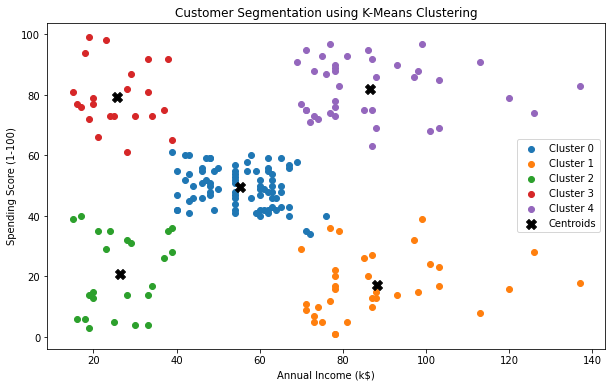

Final centroids:
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df = pd.read_csv("Mall_Customers.csv")


X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# number of clusters
K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
df["Cluster"] = kmeans.labels_

# Visualizethe clusters
plt.figure(figsize=(10, 6))
for cluster in range(K):
    plt.scatter(df.loc[df["Cluster"] == cluster, "Annual Income (k$)"],
                df.loc[df["Cluster"] == cluster, "Spending Score (1-100)"],
                label=f"Cluster {cluster}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color="black", marker="X", s=100, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means Clustering")
plt.legend()
plt.show()

# Print 
print("Final centroids:")
print(kmeans.cluster_centers_)


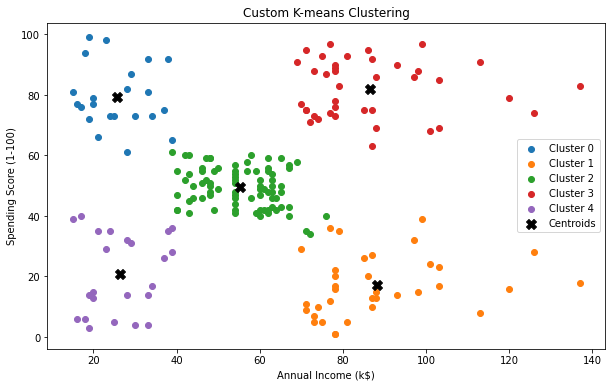

Final centroids:
   Annual Income (k$)  Spending Score (1-100)
0           25.727273               79.363636
1           88.200000               17.114286
2           55.296296               49.518519
3           86.538462               82.128205
4           26.304348               20.913043


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




data = pd.read_csv("Mall_Customers.csv")


X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Initialize centroids 
K = 5  # Number of clusters
n_samples, n_features = X.shape
centroids = X.sample(K)

#  K-means loop
max_iterations = 100
for iteration in range(max_iterations):
    # Calculate distance
    distances = np.zeros((n_samples, K))
    for i in range(K):
        distances[:, i] = np.sqrt(
            (X["Annual Income (k$)"] - centroids.iloc[i]["Annual Income (k$)"]) ** 2
            + (X["Spending Score (1-100)"] - centroids.iloc[i]["Spending Score (1-100)"]) ** 2
        )

    
    cluster_labels = np.argmin(distances, axis=1)

    # Update centroids
    new_centroids = pd.DataFrame(np.zeros((K, n_features)), columns=X.columns)
    for i in range(K):
        new_centroids.iloc[i] = X[cluster_labels == i].mean()

    if centroids.equals(new_centroids):
        break  # Convergence reached
    centroids = new_centroids

#labels to the dataset
data["Cluster"] = cluster_labels

# Visualize 
plt.figure(figsize=(10, 6))
for cluster in range(K):
    plt.scatter(data.loc[data["Cluster"] == cluster, "Annual Income (k$)"],
                data.loc[data["Cluster"] == cluster, "Spending Score (1-100)"],
                label=f"Cluster {cluster}")
plt.scatter(centroids["Annual Income (k$)"], centroids["Spending Score (1-100)"],
            color="black", marker="X", s=100, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Custom K-means Clustering")
plt.legend()
plt.show()

# Print final centroids
print("Final centroids:")
print(centroids)
